In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
with open("hk_n_clust_per_module.txt") as file:
    hk_lines = file.readlines()
    
with open("spccl_n_clust_per_module.txt") as file:
    spccl_lines = file.readlines()

In [4]:
hk_lines

['Running build/bin/traccc_seq_example_cuda tml_detector/trackml-detector.csv tml_pixels/ 1\n',
 'Starting CUDA clusterization.\n',
 'Number of modules: 3859\n',
 'TIME TAKEN FOR HK CLUSTERISATION: 0.311944s\n',
 'TIME TAKEN FOR LABEL NORMALISATION: 0.172872s\n',
 'After: 9 clusters in module 3840.\n',
 'After: 7 clusters in module 3841.\n',
 'After: 12 clusters in module 3842.\n',
 'After: 12 clusters in module 3843.\n',
 'After: 10 clusters in module 3844.\n',
 'After: 7 clusters in module 3845.\n',
 'After: 7 clusters in module 3846.\n',
 'After: 6 clusters in module 3847.\n',
 'After: 12 clusters in module 3848.\n',
 'After: 10 clusters in module 3849.\n',
 'After: 12 clusters in module 3850.\n',
 'After: 8 clusters in module 3851.\n',
 'After: 7 clusters in module 3852.\n',
 'After: 9 clusters in module 3853.\n',
 'After: 9 clusters in module 3854.\n',
 'After: 11 clusters in module 3855.\n',
 'After: 6 clusters in module 3856.\n',
 'After: 6 clusters in module 3857.\n',
 'After: 

In [10]:
hk_n_clusters = {}
spccl_n_clusters = {}
for line in hk_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        hk_n_clusters[module_num] = n_clusters
        
for line in spccl_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        spccl_n_clusters[module_num] = n_clusters

In [15]:
n_modules = len(list(hk_n_clusters.keys()))
print(n_modules == len(list(spccl_n_clusters.keys())))

True


In [20]:
n_mismatches = 0

for module in range(n_modules):
    num_clusters_hk = hk_n_clusters[module]
    num_clusters_spccl = spccl_n_clusters[module]
    
    if (num_clusters_hk != num_clusters_spccl):
        n_mismatches += 1
        print(f"Cluster mismatch found in module {module}.")
        print(f"HK: {num_clusters_hk} clusters found. Sparse CCL: {num_clusters_spccl} clusters found\n")

Cluster mismatch found in module 541.
HK: 31 clusters found. Sparse CCL: 30 clusters found

Cluster mismatch found in module 742.
HK: 27 clusters found. Sparse CCL: 18 clusters found

Cluster mismatch found in module 743.
HK: 26 clusters found. Sparse CCL: 19 clusters found

Cluster mismatch found in module 744.
HK: 28 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 745.
HK: 20 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 746.
HK: 21 clusters found. Sparse CCL: 14 clusters found

Cluster mismatch found in module 747.
HK: 13 clusters found. Sparse CCL: 9 clusters found

Cluster mismatch found in module 748.
HK: 9 clusters found. Sparse CCL: 7 clusters found

Cluster mismatch found in module 749.
HK: 33 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 750.
HK: 22 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 751.
HK: 24 clusters found. Sparse CCL: 16 cluster

In [21]:
print(n_mismatches)

557


In [25]:
hk_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
spccl_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
for module in range(n_modules):
    hk_num_clusters_np[module] = hk_n_clusters[module]
    spccl_num_clusters_np[module] = spccl_n_clusters[module]

In [28]:
num_cluster_diffs = hk_num_clusters_np - spccl_num_clusters_np

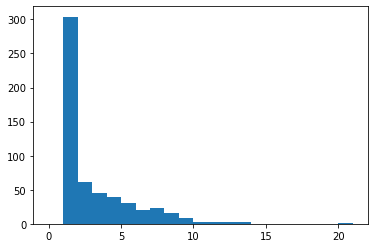

In [39]:
bin_edges = np.arange(22)
_, bins, _ = plt.hist(num_cluster_diffs[np.where(num_cluster_diffs)[0]], bins = bin_edges)
#plt.yscale("log")
plt.show()

In [38]:
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

$\textbf{To bring up tomorrow}$: Matching rate is the rate between the CPU and GPU, not between the "real" values/measurements and the evaluated ones from GPU and/or CPU.

In [2]:
thread_numbers = [64, 128, 256, 512, 1024]
time_taken_with_lookup = []
time_taken_without_lookup = []

msmnt_matching_rate_lookup = []
msmnt_matching_rate_no_lookup = []

track_parameter_matching_rate_lookup = []
track_parameter_matching_rate_no_lookup = []


for thread_number in thread_numbers:
    with open("threadsPerBlock_" + str(thread_number) + ".txt") as file:
        thread_lines = file.readlines()
        
    with open("less_lookup_" + str(thread_number) + "threads.txt") as file:
        less_lookup_lines = file.readlines()
        
    for line in thread_lines:
        
        if "measurements matching rate" in line:
            rate_begins = line.find(":") + 2
            msmnt_matching_rate_lookup.append(float(line[rate_begins:-1]))
            
        elif "track parameters matching rate" in line:
            rate_begins = line.find(":") + 2
            track_parameter_matching_rate_lookup.append(float(line[rate_begins:-1]))
        
        elif "clusterization and sp formation (cuda)" in line:
            time_taken_begins = line.find(")") + 2
            time_taken_with_lookup.append(float(line[time_taken_begins:-1]))
            break
            
    for line in less_lookup_lines:
        
        if "measurements matching rate" in line:
            rate_begins = line.find(":") + 2
            msmnt_matching_rate_no_lookup.append(float(line[rate_begins:-1]))
            
        elif "track parameters matching rate" in line:
            rate_begins = line.find(":") + 2
            track_parameter_matching_rate_no_lookup.append(float(line[rate_begins:-1]))
        
        elif "clusterization and sp formation (cuda)" in line:
            time_taken_begins = line.find(")") + 2
            time_taken_without_lookup.append(float(line[time_taken_begins:-1]))
            break

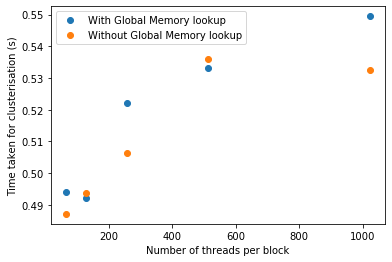

In [3]:
plt.plot(thread_numbers, time_taken_with_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, time_taken_without_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Time taken for clusterisation (s)")
plt.legend()
plt.show()

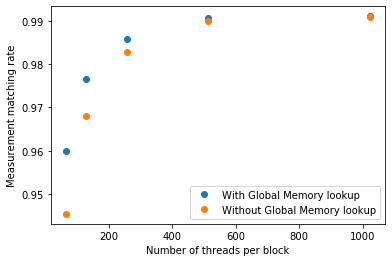

In [4]:
plt.plot(thread_numbers, msmnt_matching_rate_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, msmnt_matching_rate_no_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Measurement matching rate")
plt.legend()
plt.show()

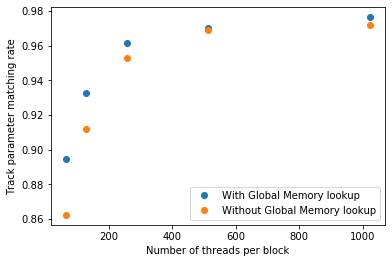

In [5]:
plt.plot(thread_numbers, track_parameter_matching_rate_lookup, "o", label="With Global Memory lookup")
plt.plot(thread_numbers, track_parameter_matching_rate_no_lookup, "o", label="Without Global Memory lookup")
plt.xlabel("Number of threads per block")
plt.ylabel("Track parameter matching rate")
plt.legend()
plt.show()

Meeting on 24/02:
$\begin{itemize}
    \item Per thread timing (for individual modules, maybe pick some low and high occupancy modules)
    \item Per module accuracy (are bigger ones worse necessarily?)
    \item Check "distance" (\chi^2 thingy) between cpu and gpu for different something (like threads per block)
    \item Reduce global lookup with cell and label structures, i.e. put the current cell position and label in shared memory
\end{itemise}$

In [6]:
times_256_nowhile = np.array([0.2815, 0.2846, 0.2796, 0.2705, 0.2735])
times_256_while = np.array([0.2813, 0.2758, 0.2866, 0.2737, 0.2759])

In [7]:
mean_nowhile = np.mean(times_256_nowhile)
mean_while = np.mean(times_256_while)
print(mean_while - mean_nowhile)

0.0007199999999999984


In [8]:
spccl_times = np.zeros(10)
for i in range(10):
    path = "spccl/" + str(i+1) + ".txt"
    with open(path) as file:
        lines = file.readlines()
    
    spccl_times[i] = float(lines[3][35:-2])
    
spccl_mean = np.mean(spccl_times)
spccl_std = np.std(spccl_times)

ValueError: could not convert string to float: ''

In [2]:
n_msmnts = 10
n_events = 10
n_diff_threads = 16

thread_nos = np.arange(1, n_diff_threads + 1, dtype=np.int32) * 64
hk_naive_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_naive_diag_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_find_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_find_norm_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_first_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate2_times = np.zeros((n_diff_threads,n_msmnts, n_events))

hk_fconn_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_first_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_find_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_naive_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_naive_diag_SPCCL_CPU_times = np.zeros((n_diff_threads,n_msmnts, n_events))


hk_naive_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_naive_diag_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_find_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_first_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate2_track_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))

hk_naive_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_naive_diag_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_find_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_fconn_first_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))
hk_iterate2_msmnt_accuracy = np.zeros((n_diff_threads,n_msmnts, n_events))

In [244]:
# # hk naive no diagonals
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "hk_naive_no_diag/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()
            
#         event_start_line = 1
#         for k in range(n_events):
            
#             #print(path, lines[3])
#             hk_naive_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
#             hk_naive_track_accuracy[j, i, k] = float(lines[event_start_line + 9][33:-1])
#             hk_naive_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 6][29:-1])
#             event_start_line += 12  # go to the next event
            

# # hk naive with diagonals
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "hk_naive/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()

#         event_start_line = 1
#         for k in range(n_events):
            
#             hk_naive_diag_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
#             hk_naive_diag_track_accuracy[j, i, k] = float(lines[event_start_line + 9][33:-1])
#             hk_naive_diag_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 6][29:-1])
#             event_start_line += 12  # go to the next event

# # traceback in fconn only
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "find/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()
    
#         event_start_line = 1
#         for k in range(n_events):
#             hk_find_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
#             #hk_find_norm_times[j, i, k] = float(lines[event_start_line + 3][35:-2])
#             hk_find_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
#             hk_find_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             event_start_line += 12  # go to the next event

# # with normalisation and nearest neighbour in same step
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "findNN/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()
            
#         event_start_line = 1
#         for k in range(n_events):
            
#             hk_findNN_times[j,i,k] = float(lines[event_start_line + 3][34:-2])
#             hk_findNN_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
#             hk_findNN_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             event_start_line += 12  # go to the next event

# # with normalisation and nearest neighbour in same step
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "break_after_NN/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()
            
#         event_start_line = 1
#         for k in range(n_events):
            
#             hk_findNN_left_times[j,i,k] = float(lines[event_start_line + 3][34:-2])
#             hk_findNN_left_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             hk_findNN_left_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
#             event_start_line += 12  # go to the next event

# improved full fconn, tiny code upgrade
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "fconn/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()
            
#         event_start_line = 1
#         for k in range(n_events):
#             hk_fconn_times[j,i,k] = float(lines[event_start_line + 3][34:-2])
#             hk_fconn_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 4][39:-2])
#             hk_fconn_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             hk_fconn_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])

#             event_start_line += 12  # go to the next event
# # iterate
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         event_start_line = 1
#         for k in range(n_events):
        

#             path = "iterate/" + str(thread_no) + "/" + str(i+1) + ".txt"
#             with open(path) as file:
#                 lines = file.readlines()

#             hk_iterate_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
#             hk_iterate_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             hk_iterate_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
#             event_start_line += 12  # go to the next event
# # iterate improved
# for i in range(n_msmnts):
#     for j, thread_no in enumerate(thread_nos):
#         path = "iterate_improved/" + str(thread_no) + "/" + str(i+1) + ".txt"
#         with open(path) as file:
#             lines = file.readlines()

#         event_start_line = 1
#         for k in range(n_events):
            
#             hk_iterate2_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
#             hk_find_norm_times[j, i, k] = float(lines[event_start_line + 3][35:-2])
#             hk_iterate2_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
#             hk_iterate2_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
#             event_start_line += 12  # go to the next event

In [347]:
# FCONN
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "fconn/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()
            
        event_start_line = 1 + 12*(10 - n_events)
        for k in range(n_events):
            hk_fconn_times[j,i,k] = float(lines[event_start_line + 3][34:-2])
            hk_fconn_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 4][39:-2])
            hk_fconn_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
            hk_fconn_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])

            event_start_line += 12  # go to the next event

# FCONN with first NN prioritised
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "fconn_first_2/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()
            
        event_start_line = 1 + 12*(10 - n_events)
        for k in range(n_events):
            #print(lines)
            hk_fconn_first_times[j,i,k] = float(lines[event_start_line + 3][34:-2])
            hk_fconn_first_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 4][39:-2])
            hk_fconn_first_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
            hk_fconn_first_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])

            event_start_line += 12  # go to the next event

# FCONN without normalisation
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "fconn_no_norm/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()
    
        event_start_line = 1 + 12*(10 - n_events)
        for k in range(n_events):
            hk_find_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
            #hk_find_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 4][39:-2])
            #hk_find_norm_times[j, i, k] = float(lines[event_start_line + 3][35:-2])
            hk_find_track_accuracy[j, i, k] = float(lines[event_start_line + 10][33:-1])
            hk_find_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 7][29:-1])
            event_start_line += 11  # go to the next event

# iterate
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "iterate_improved/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()

        event_start_line = 1 + 12*(10 - n_events)
        for k in range(n_events):
            
            hk_iterate2_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
            hk_iterate_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 4][39:-2])
            hk_find_norm_times[j, i, k] = float(lines[event_start_line + 3][35:-2])
            hk_iterate2_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 8][29:-1])
            hk_iterate2_track_accuracy[j, i, k] = float(lines[event_start_line + 11][33:-1])
            event_start_line += 12  # go to the next event
            
# hk naive no diagonals
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "hk_naive_no_diag_10/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()
            
        event_start_line = 1 + 11*(10 - n_events)
        for k in range(n_events):
            
            #print(path, lines[3])
            hk_naive_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
            hk_naive_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 3][39:-2])
            hk_naive_track_accuracy[j, i, k] = float(lines[event_start_line + 10][33:-1])
            hk_naive_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 7][29:-1])
            event_start_line += 11  # go to the next event
            

# hk naive with diagonals
for i in range(n_msmnts):
    for j, thread_no in enumerate(thread_nos):
        path = "hk_naive_10/" + str(thread_no) + "/" + str(i+1) + ".txt"
        with open(path) as file:
            lines = file.readlines()

        event_start_line = 1 + 11*(10 - n_events)
        for k in range(n_events):
            
            hk_naive_diag_times[j,i,k] = float(lines[event_start_line + 2][34:-2])
            hk_naive_diag_SPCCL_CPU_times[j, i, k] = float(lines[event_start_line + 3][39:-2])
            hk_naive_diag_track_accuracy[j, i, k] = float(lines[event_start_line + 10][33:-1])
            hk_naive_diag_msmnt_accuracy[j, i, k] = float(lines[event_start_line + 7][29:-1])
            event_start_line += 11  # go to the next event


In [348]:
# MEANS AND STD OVER ALL EVENTS
n_total_msmnts = n_msmnts * n_events

# get means for naive HK
hk_naive_means = np.mean(hk_naive_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_std = np.std(hk_naive_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_err = hk_naive_std / np.sqrt(n_total_msmnts)

hk_naive_diag_means = np.mean(hk_naive_diag_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_std = np.std(hk_naive_diag_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_err = hk_naive_diag_std / np.sqrt(n_total_msmnts)

# get all the means from the find algorithm and the normalisation with that
hk_find_means = np.mean(hk_find_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_std = np.std(hk_find_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_err = hk_find_std / np.sqrt(n_total_msmnts)

hk_find_norm_means = np.mean(hk_find_norm_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_norm_std = np.std(hk_find_norm_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_norm_err = hk_find_norm_std / np.sqrt(n_total_msmnts)

# get all the means from the NN+Norm implementation of the find algorithm
# hk_findNN_means = np.mean(hk_findNN_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_std = np.std(hk_findNN_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_err = hk_findNN_std / np.sqrt(n_total_msmnts)

# hk_findNN_left_means = np.mean(hk_findNN_left_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_std = np.std(hk_findNN_left_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_err = hk_findNN_left_std / np.sqrt(n_total_msmnts)

hk_fconn_means = np.mean(hk_fconn_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_std = np.std(hk_fconn_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_err = hk_fconn_std / np.sqrt(n_total_msmnts)

hk_fconn_first_means = np.mean(hk_fconn_first_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_std = np.std(hk_fconn_first_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_err = hk_fconn_first_std / np.sqrt(n_total_msmnts)

# iterate
hk_iterate_means = np.mean(hk_iterate_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_std = np.std(hk_iterate_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_err = hk_iterate_std / np.sqrt(n_total_msmnts)

hk_iterate2_means = np.mean(hk_iterate2_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_std = np.std(hk_iterate2_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_err = hk_iterate2_std / np.sqrt(n_total_msmnts)

In [349]:
# SPCCL means
hk_fconn_SPCCL_CPU_means = np.mean(hk_fconn_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_SPCCL_CPU_std = np.std(hk_fconn_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_SPCCL_CPU_err = hk_fconn_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

hk_fconn_first_SPCCL_CPU_means = np.mean(hk_fconn_first_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_SPCCL_CPU_std = np.std(hk_fconn_first_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_SPCCL_CPU_err = hk_fconn_first_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

hk_find_SPCCL_CPU_means = np.mean(hk_find_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_SPCCL_CPU_std = np.std(hk_find_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_SPCCL_CPU_err = hk_find_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

hk_iterate_SPCCL_CPU_means = np.mean(hk_iterate_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_SPCCL_CPU_std = np.std(hk_iterate_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_SPCCL_CPU_err = hk_iterate_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

hk_naive_SPCCL_CPU_means = np.mean(hk_naive_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_SPCCL_CPU_std = np.std(hk_naive_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_SPCCL_CPU_err = hk_naive_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

hk_naive_diag_SPCCL_CPU_means = np.mean(hk_naive_diag_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_SPCCL_CPU_std = np.std(hk_naive_diag_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_SPCCL_CPU_err = hk_naive_diag_SPCCL_CPU_std / np.sqrt(n_total_msmnts)

In [350]:
norm_times_in_findNN_means = hk_findNN_means - hk_find_means
norm_times_in_findNN_err = hk_findNN_err + hk_find_err
# use this to rescale the normalisation time post find, to compare shapes
norm_time_in_findNN = np.mean(norm_times_in_findNN_means)
norm_time_after_find = np.mean(hk_find_norm_means)
norm_ratio = norm_time_in_findNN / norm_time_after_find
hk_find_norm_means_rescaled = hk_find_norm_means * norm_ratio
hk_find_norm_err_rescaled = hk_find_norm_err * norm_ratio

In [351]:
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
colours[0] = "royalblue"
colours[1] = "darkgreen"
colours[2] = "red"
colours[3] = "dimgrey"
colours[4] = "rebeccapurple"
colours[5] = "midnightblue"
colours[6] = "chocolate"

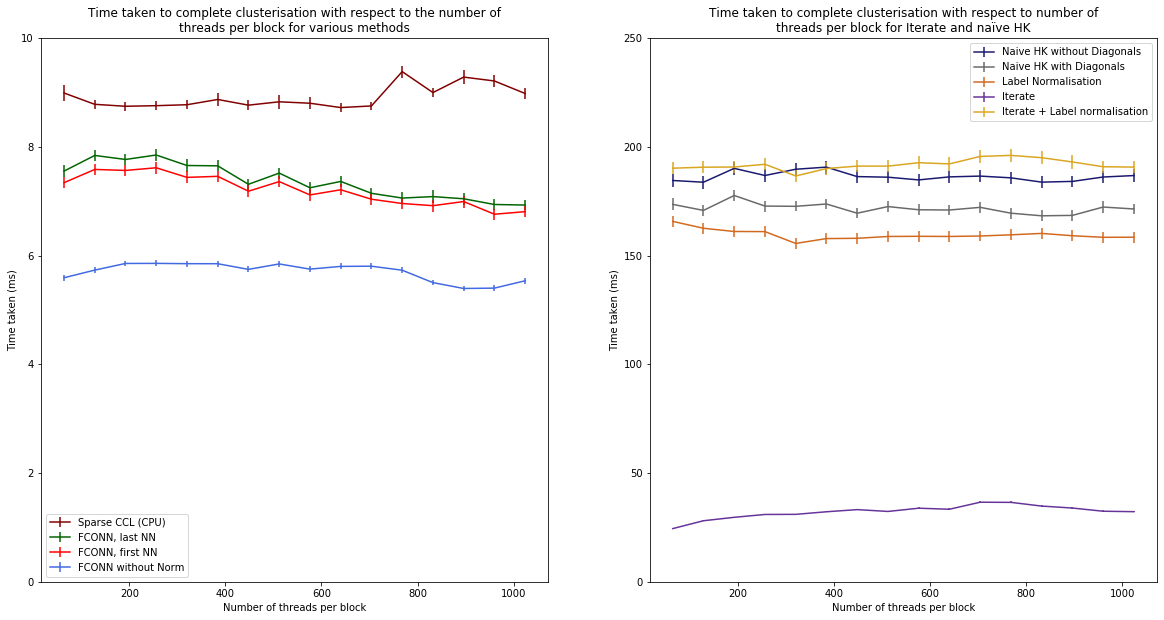

In [364]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.errorbar(thread_nos, hk_find_SPCCL_CPU_means, yerr=hk_find_SPCCL_CPU_err,
             label="Sparse CCL (CPU)", color="maroon")
ax1.errorbar(thread_nos, hk_fconn_means, yerr=hk_fconn_err,
             label="FCONN, last NN", color=colours[1])
ax1.errorbar(thread_nos, hk_fconn_first_means, yerr=hk_fconn_first_err,
             label="FCONN, first NN", color=colours[2])
ax1.errorbar(thread_nos, hk_find_means, yerr=hk_find_err,
             label="FCONN without Norm", color=colours[0])
# ax1.errorbar(thread_nos, hk_iterate2_means, yerr=hk_iterate2_err,
#              label="Iterate", color=colours[4])
ax1.set_ylim(0, 0.01)
ax1.set_title("Time taken to complete clusterisation with respect to the number of\n"
             +"threads per block for various methods")
ax1.set_ylabel("Time taken (ms)")
ax1.set_yticklabels((ax1.get_yticks() * 1000).astype(int))
ax1.set_xlabel("Number of threads per block")
ax1.legend()

ax2.errorbar(thread_nos, hk_naive_means, yerr=hk_naive_err,
             label="Naive HK without Diagonals", color=colours[5])
ax2.errorbar(thread_nos, hk_naive_diag_means, yerr=hk_naive_diag_err,
             label="Naive HK with Diagonals", color=colours[3])
ax2.errorbar(thread_nos, hk_find_norm_means, yerr=hk_find_norm_err,
             label="Label Normalisation", color=colours[6])
ax2.errorbar(thread_nos, hk_iterate2_means, yerr=hk_iterate2_err,
             label="Iterate", color=colours[4])
ax2.errorbar(thread_nos, hk_iterate2_means+hk_find_norm_means, yerr=(hk_iterate2_err+hk_find_norm_err),
             label="Iterate + Label normalisation", color="goldenrod")
ax2.set_ylim(0, 0.25)
ax2.set_title("Time taken to complete clusterisation with respect to number of\n"
             +"threads per block for Iterate and naïve HK")
ax2.set_ylabel("Time taken (ms)")
ax2.set_xlabel("Number of threads per block")
ax2.set_yticklabels((ax2.get_yticks() * 1000).astype(int))
ax2.legend()
plt.savefig("clusterisation_times2.pdf")
plt.show()

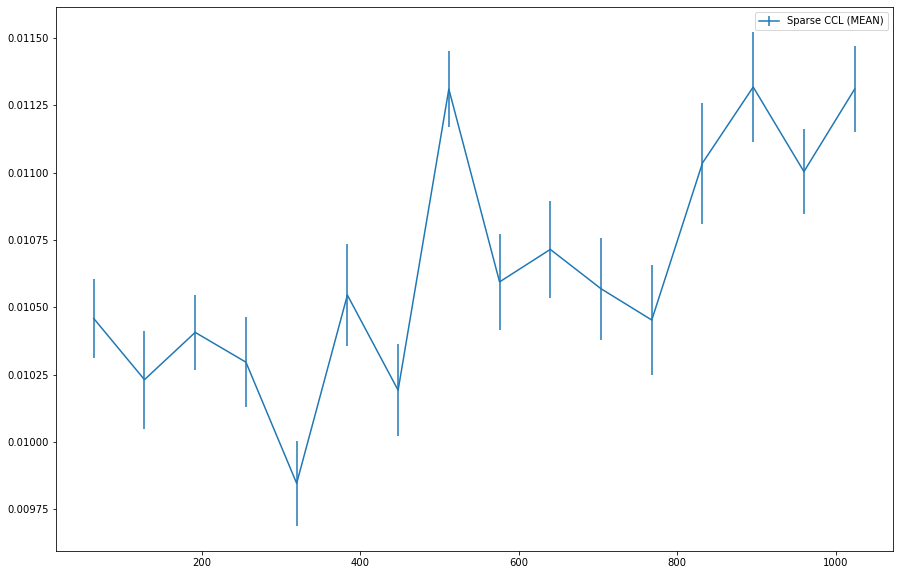

In [353]:
hk_SPCCL_CPU_means = (hk_fconn_SPCCL_CPU_means + 
                      hk_fconn_first_SPCCL_CPU_means+
                      hk_find_SPCCL_CPU_means +
                      hk_iterate_SPCCL_CPU_means +
                      hk_naive_SPCCL_CPU_means +
                      hk_naive_diag_SPCCL_CPU_means) / 6

hk_SPCCL_CPU_err = (hk_fconn_SPCCL_CPU_err + 
                    hk_fconn_first_SPCCL_CPU_err+
                    hk_find_SPCCL_CPU_err +
                    hk_iterate_SPCCL_CPU_err +
                    hk_naive_SPCCL_CPU_err +
                    hk_naive_diag_SPCCL_CPU_err) / 6


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# ax.errorbar(thread_nos, hk_fconn_SPCCL_CPU_means, yerr=hk_fconn_SPCCL_CPU_err,
#              label="Sparse CCL (FCONN last)")
# ax.errorbar(thread_nos, hk_fconn_first_SPCCL_CPU_means, yerr=hk_fconn_first_SPCCL_CPU_err,
#              label="Sparse CCL (FCONN first)")
# ax.errorbar(thread_nos, hk_find_SPCCL_CPU_means, yerr=hk_find_SPCCL_CPU_err,
#              label="Sparse CCL (Find only)")
# ax.errorbar(thread_nos, hk_iterate_SPCCL_CPU_means, yerr=hk_iterate_SPCCL_CPU_err,
#              label="Sparse CCL (iterate)")
# ax.errorbar(thread_nos, hk_naive_SPCCL_CPU_means, yerr=hk_naive_SPCCL_CPU_err,
#              label="Sparse CCL (Naive)")
# ax.errorbar(thread_nos, hk_naive_diag_SPCCL_CPU_means, yerr=hk_naive_diag_SPCCL_CPU_err,
#              label="Sparse CCL (Naive Diag)")
ax.errorbar(thread_nos, hk_SPCCL_CPU_means, yerr=hk_SPCCL_CPU_err,
             label="Sparse CCL (MEAN)")

ax.legend()
plt.show()

In [354]:
# hk naive
hk_naive_track_acc_means = np.mean(hk_naive_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_track_acc_std = np.std(hk_naive_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_track_acc_err = hk_naive_track_acc_std / np.sqrt(n_total_msmnts)

hk_naive_diag_track_acc_means = np.mean(hk_naive_diag_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_track_acc_std = np.std(hk_naive_diag_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_track_acc_err = hk_naive_diag_track_acc_std / np.sqrt(n_total_msmnts)

# hk only traceback
hk_find_track_acc_means = np.mean(hk_find_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_track_acc_std = np.std(hk_find_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_track_acc_err = hk_find_track_acc_std / np.sqrt(n_total_msmnts)

# hk full fconn
# hk_findNN_track_acc_means = np.mean(hk_findNN_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_track_acc_std = np.std(hk_findNN_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_track_acc_err = hk_findNN_track_acc_std / np.sqrt(n_total_msmnts)

# hk_findNN_left_track_acc_means = np.mean(hk_findNN_left_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_track_acc_std = np.std(hk_findNN_left_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_track_acc_err = hk_findNN_left_track_acc_std / np.sqrt(n_total_msmnts)

hk_fconn_track_acc_means = np.mean(hk_fconn_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_track_acc_std = np.std(hk_fconn_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_track_acc_err = hk_fconn_track_acc_std / np.sqrt(n_total_msmnts)

hk_fconn_first_track_acc_means = np.mean(hk_fconn_first_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_track_acc_std = np.std(hk_fconn_first_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_track_acc_err = hk_fconn_first_track_acc_std / np.sqrt(n_total_msmnts)

# iterate
hk_iterate_track_acc_means = np.mean(hk_iterate_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_track_acc_std = np.std(hk_iterate_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_track_acc_err = hk_iterate_track_acc_std / np.sqrt(n_total_msmnts)

hk_iterate2_track_acc_means = np.mean(hk_iterate2_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_track_acc_std = np.std(hk_iterate2_track_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_track_acc_err = hk_iterate2_track_acc_std / np.sqrt(n_total_msmnts)

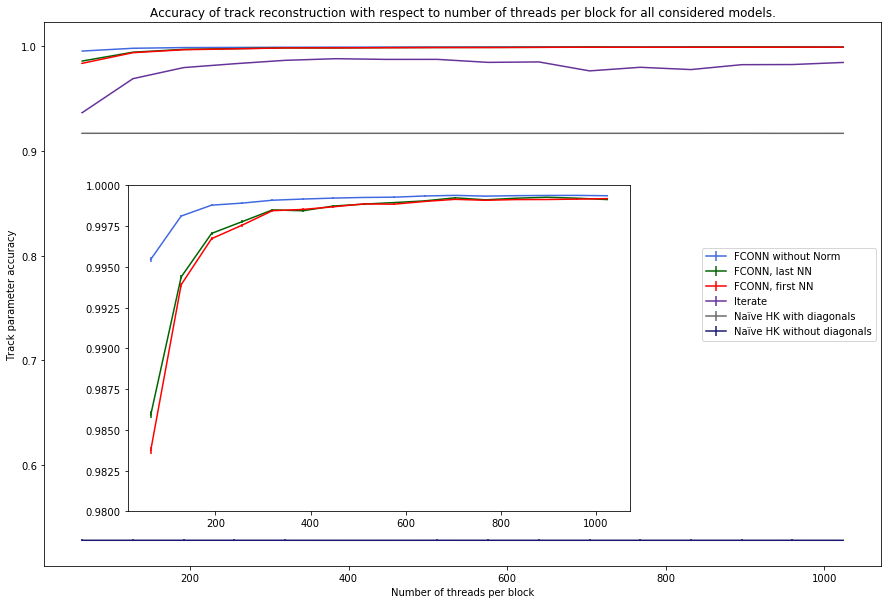

In [363]:
fig, axin = plt.subplots(1,1, figsize=(15,10))
ax = axin.inset_axes([0.1, 0.1, 0.6, 0.6])

#fig, (ax, axin) = plt.subplots(1, 2, figsize=(20, 10))
ax.errorbar(thread_nos, hk_find_track_acc_means, yerr=hk_find_track_acc_err,
            label="FCONN without Norm", color=colours[0])
ax.errorbar(thread_nos, hk_fconn_track_acc_means, yerr=hk_fconn_track_acc_err,
            label="FCONN, last NN", color=colours[1])
ax.errorbar(thread_nos, hk_fconn_first_track_acc_means, yerr=hk_fconn_first_track_acc_err,
            label="FCONN, first NN", color=colours[2])
# ax.errorbar(thread_nos, hk_iterate2_track_acc_means, yerr=hk_iterate2_track_acc_err,
#             label="Iterate", color=colours[4])

# inset the iterate in there
axin.errorbar(thread_nos, hk_find_track_acc_means, yerr=hk_find_track_acc_err,
              label="FCONN without Norm", color=colours[0])
axin.errorbar(thread_nos, hk_fconn_track_acc_means, yerr=hk_fconn_track_acc_err,
              label="FCONN, last NN", color=colours[1])
axin.errorbar(thread_nos, hk_fconn_first_track_acc_means, yerr=hk_fconn_first_track_acc_err,
              label="FCONN, first NN", color=colours[2])
axin.errorbar(thread_nos, hk_iterate2_track_acc_means, yerr=hk_iterate2_track_acc_err,
              label="Iterate", color=colours[4])
axin.errorbar(thread_nos, hk_naive_diag_track_acc_means, yerr=hk_naive_diag_track_acc_err,
              label="Naïve HK with diagonals", color=colours[3])
axin.errorbar(thread_nos, hk_naive_track_acc_means, yerr=hk_naive_track_acc_err,
              label="Naïve HK without diagonals", color=colours[5])
axin.legend()
axin.set_title("Accuracy of track reconstruction with respect to number of threads per block "
              +"for all considered models.")
axin.set_ylabel("Track parameter accuracy")
axin.set_xlabel("Number of threads per block")


ax.set_ylim(0.98, 1)
# ax.set_title("Accuracy of track reconstruction with respect to number of threads per block")
# ax.set_ylabel("Track parameter accuracy")
# ax.set_xlabel("Number of threads per block")
#ax.legend()
plt.savefig("track_parameter_acc2.pdf")
plt.show()

In [358]:
hk_naive_msmnt_acc_means = np.mean(hk_naive_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_msmnt_acc_std = np.std(hk_naive_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_msmnt_acc_err = hk_naive_msmnt_acc_std / np.sqrt(n_total_msmnts)

hk_naive_diag_msmnt_acc_means = np.mean(hk_naive_diag_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_msmnt_acc_std = np.std(hk_naive_diag_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_naive_diag_msmnt_acc_err = hk_naive_diag_msmnt_acc_std / np.sqrt(n_total_msmnts)


hk_find_msmnt_acc_means = np.mean(hk_find_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_msmnt_acc_std = np.std(hk_find_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_find_msmnt_acc_err = hk_find_msmnt_acc_std / np.sqrt(n_total_msmnts)


# hk_findNN_msmnt_acc_means = np.mean(hk_findNN_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_msmnt_acc_std = np.std(hk_findNN_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_msmnt_acc_err = hk_findNN_msmnt_acc_std / np.sqrt(n_total_msmnts)

# hk_findNN_left_msmnt_acc_means = np.mean(hk_findNN_left_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_msmnt_acc_std = np.std(hk_findNN_left_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
# hk_findNN_left_msmnt_acc_err = hk_findNN_left_msmnt_acc_std / np.sqrt(n_total_msmnts)

hk_fconn_msmnt_acc_means = np.mean(hk_fconn_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_msmnt_acc_std = np.std(hk_fconn_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_msmnt_acc_err = hk_fconn_msmnt_acc_std / np.sqrt(n_total_msmnts)

hk_fconn_first_msmnt_acc_means = np.mean(hk_fconn_first_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_msmnt_acc_std = np.std(hk_fconn_first_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_fconn_first_msmnt_acc_err = hk_fconn_first_msmnt_acc_std / np.sqrt(n_total_msmnts)


hk_iterate_msmnt_acc_means = np.mean(hk_iterate_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_msmnt_acc_std = np.std(hk_iterate_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate_msmnt_acc_err = hk_iterate_msmnt_acc_std / np.sqrt(n_total_msmnts)

hk_iterate2_msmnt_acc_means = np.mean(hk_iterate2_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_msmnt_acc_std = np.std(hk_iterate2_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts), axis=1)
hk_iterate2_msmnt_acc_err = hk_iterate2_msmnt_acc_std / np.sqrt(n_total_msmnts)

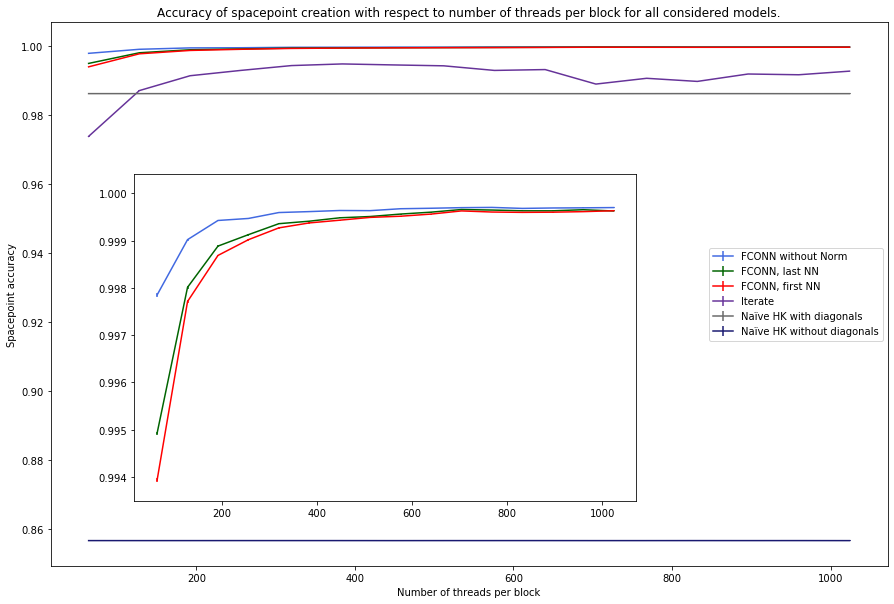

In [362]:
fig, axin = plt.subplots(1,1, figsize=(15,10))
# inset the iterate in there
ax = axin.inset_axes([0.1, 0.12, 0.6, 0.6])

ax.errorbar(thread_nos, hk_find_msmnt_acc_means, yerr=hk_find_msmnt_acc_err,
            label="FCONN without Norm", color=colours[0])
ax.errorbar(thread_nos, hk_fconn_msmnt_acc_means, yerr=hk_fconn_msmnt_acc_err,
            label="FCONN, last NN", color=colours[1])
ax.errorbar(thread_nos, hk_fconn_first_msmnt_acc_means, yerr=hk_fconn_first_msmnt_acc_err,
            label="FCONN, first NN", color=colours[2])

axin.errorbar(thread_nos, hk_find_msmnt_acc_means, yerr=hk_find_msmnt_acc_err,
              label="FCONN without Norm", color=colours[0])
axin.errorbar(thread_nos, hk_fconn_msmnt_acc_means, yerr=hk_fconn_msmnt_acc_err,
            label="FCONN, last NN", color=colours[1])
axin.errorbar(thread_nos, hk_fconn_first_msmnt_acc_means, yerr=hk_fconn_first_msmnt_acc_err,
            label="FCONN, first NN", color=colours[2])
axin.errorbar(thread_nos, hk_iterate2_msmnt_acc_means, yerr=hk_iterate2_msmnt_acc_err,
              label="Iterate", color=colours[4])
axin.errorbar(thread_nos, hk_naive_diag_msmnt_acc_means, yerr=hk_naive_diag_msmnt_acc_err,
              label="Naïve HK with diagonals", color=colours[3])
axin.errorbar(thread_nos, hk_naive_msmnt_acc_means, yerr=hk_naive_msmnt_acc_err,
              label="Naïve HK without diagonals", color=colours[5])
axin.legend(loc="center right")
axin.set_title("Accuracy of spacepoint creation with respect to number of threads per block "
              +"for all considered models.")
axin.set_ylabel("Spacepoint accuracy")
axin.set_xlabel("Number of threads per block")

ax.set_ylim(0.9935, 1.0004)
# ax.set_title("Accuracy of spacepoint creation with respect to number of threads per block")
# ax.set_ylabel("Spacepoint accuracy")
# ax.set_xlabel("Number of threads per block")
#ax.legend()
plt.savefig("spacepoint_acc2.pdf")
plt.show()

In [373]:
print(thread_nos)

[  64  128  192  256  320  384  448  512  576  640  704  768  832  896
  960 1024]


In [41]:
spccl_gpu_times = np.zeros(10)
spccl_cpu_times = np.zeros(10)

for i in range(10):
    path = "spccl/" + str(i+1) + ".txt"
    with open(path) as file:
        lines = file.readlines()

    spccl_gpu_times[i] = float(lines[4][36:-2])
    spccl_cpu_times[i] = float(lines[23][26:-1])

In [48]:
# get everything in milliseconds

spccl_gpu_time_mean = 1000 * np.mean(spccl_gpu_times)
spccl_gpu_time_err = 1000 * np.std(spccl_gpu_times) / np.sqrt(10)

spccl_cpu_time_mean = 1000 * np.mean(spccl_cpu_times)
spccl_cpu_time_err = 1000 * np.std(spccl_cpu_times) / np.sqrt(10)

# Minima of find alone and with normalisation together in one
min_time_find_idx = np.argmax(hk_find_means*-1)
min_time_threads = thread_nos[min_time_find_idx]
min_time = 1000 * hk_find_means[min_time_find_idx]
min_time_err = 1000 * hk_find_err[min_time_find_idx]

min_time_findNN_idx = np.argmax(hk_findNN_means*-1)
min_time_threads_NN = thread_nos[min_time_findNN_idx]
min_time_NN = 1000 * hk_findNN_means[min_time_findNN_idx]
min_time_err_NN = 1000 * hk_findNN_err[min_time_findNN_idx]

In [49]:
print(f"Sparse CCL: CPU: {spccl_cpu_time_mean:.2f} +- {spccl_cpu_time_err:.2f}ms;"+
      f" GPU: {spccl_gpu_time_mean:.2f} +- {spccl_gpu_time_err:.2f}ms")

print(f"Minimum time using Find algorithm on GPU: {min_time:.2f} +- {min_time_err:.2f}ms. "+
      f"This is for {min_time_threads} threads per block.")
print(f"Minimum time using Find algorithm with norm on GPU: {min_time_NN:.2f} +- {min_time_err_NN:.2f}ms. "+
      f"This is for {min_time_threads_NN} threads per block.")

Sparse CCL: CPU: 8.50 +- 0.02ms; GPU: 35.22 +- 0.19ms
Minimum time using Find algorithm on GPU: 5.42 +- 0.09ms. This is for 960 threads per block.
Minimum time using Find algorithm with norm on GPU: 9.40 +- 0.12ms. This is for 896 threads per block.


In [51]:
gpu_improvement = spccl_gpu_time_mean / min_time_NN
gpu_improvement_err = gpu_improvement * (spccl_gpu_time_err / spccl_gpu_time_mean + min_time_err_NN / min_time_NN)

print(f"For the GPU, this corresponds to factor {gpu_improvement:.2f} +- {gpu_improvement_err:.2f} improvement.")

For the GPU, this corresponds to factor 3.75 +- 0.07 improvement.


In [367]:
cells_per_event = [199547, 221248, 212871, 169172, 194383, 230878, 195346, 208324, 202533, 207042]
idle_threads = np.zeros((10, 16), dtype=np.int32)

full_str = ""
for thread_no in thread_nos:
    full_str += " & " + str(thread_no)
full_str += "\\\\\n"
for i, n_cells_in_event in enumerate(cells_per_event):
    full_str += str(n_cells_in_event)
    for j, thread_no in enumerate(thread_nos):
        n_idle_threads = n_cells_in_event % thread_no
        full_str += " & " + str(n_idle_threads)
        idle_threads[i, j] = n_idle_threads
        
    full_str += "\\\\\n"
        
print(full_str)

 & 64 & 128 & 192 & 256 & 320 & 384 & 448 & 512 & 576 & 640 & 704 & 768 & 832 & 896 & 960 & 1024\\
199547 & 59 & 123 & 59 & 123 & 187 & 251 & 187 & 379 & 251 & 507 & 315 & 635 & 699 & 635 & 827 & 891\\
221248 & 0 & 64 & 64 & 64 & 128 & 64 & 384 & 64 & 64 & 448 & 192 & 64 & 768 & 832 & 448 & 64\\
212871 & 7 & 7 & 135 & 135 & 71 & 135 & 71 & 391 & 327 & 391 & 263 & 135 & 711 & 519 & 711 & 903\\
169172 & 20 & 84 & 20 & 212 & 212 & 212 & 276 & 212 & 404 & 212 & 212 & 212 & 276 & 724 & 212 & 212\\
194383 & 15 & 79 & 79 & 79 & 143 & 79 & 399 & 335 & 271 & 463 & 79 & 79 & 527 & 847 & 463 & 847\\
230878 & 30 & 94 & 94 & 222 & 158 & 94 & 158 & 478 & 478 & 478 & 670 & 478 & 414 & 606 & 478 & 478\\
195346 & 18 & 18 & 82 & 18 & 146 & 274 & 18 & 274 & 82 & 146 & 338 & 274 & 658 & 18 & 466 & 786\\
208324 & 4 & 68 & 4 & 196 & 4 & 196 & 4 & 452 & 388 & 324 & 644 & 196 & 324 & 452 & 4 & 452\\
202533 & 37 & 37 & 165 & 37 & 293 & 165 & 37 & 293 & 357 & 293 & 485 & 549 & 357 & 37 & 933 & 805\\
207042 & 2 

In [372]:
np.mean(idle_threads, axis=0, dtype=np.int32)

array([ 19,  64,  76, 128, 134, 153, 160, 307, 288, 358, 326, 307, 544,
       473, 518, 563], dtype=int32)

In [11]:
modules_per_event = np.zeros(n_events, dtype=np.int32)
n_total_cells_per_event = np.zeros(n_events, dtype=np.int32)
cells_per_module = []

with open("n_cells_per_module_per_event.txt") as file:
    n_cells_modules_lines = file.readlines()

lines_between_events = 14
for i in range(n_events):
    modules_per_event[i] = int(n_cells_modules_lines[2 + i*lines_between_events][19:-1])
    n_total_cells_per_event[i] = int(n_cells_modules_lines[4 + i*lines_between_events][34:-1])
    
    cells_per_module_line = n_cells_modules_lines[3 + i*lines_between_events][19:-2]
    cells_per_module.append(list(map(int, cells_per_module_line.split(","))))

In [12]:
n_total_cells_per_event

array([199547, 221248, 212871, 169172, 194383, 230878, 195346, 208324,
       202533, 207042], dtype=int32)

In [45]:
min_idx = np.argmin(n_total_cells_per_event)
max_idx = np.argmax(n_total_cells_per_event)

bins = np.arange(60)*16.7

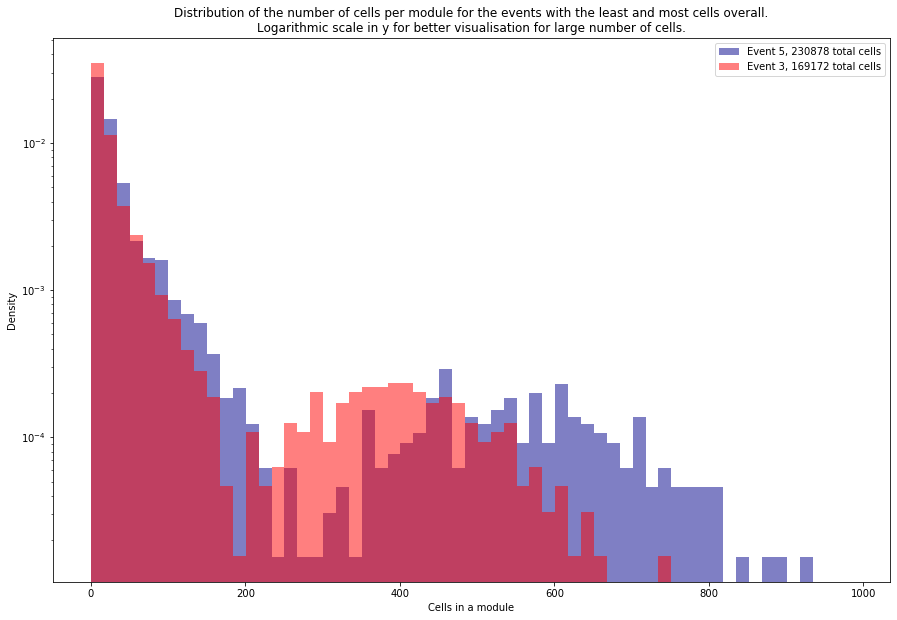

In [51]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))

ax1.hist(cells_per_module[max_idx], bins=bins, density=True, alpha=0.5, color="darkblue",
         label=f"Event {max_idx}, {n_total_cells_per_event[max_idx]} total cells")
ax1.hist(cells_per_module[min_idx], bins=bins, density=True, alpha=0.5, color="red",
         label=f"Event {min_idx}, {n_total_cells_per_event[min_idx]} total cells")
ax1.set_title("Distribution of the number of cells per module for the events with the least and most cells overall.\n"+
              "Logarithmic scale in y for better visualisation for large number of cells.")
ax1.set_xlabel("Cells in a module")
ax1.set_ylabel("Density")
ax1.set_yscale("log")
ax1.legend()

# ax2.hist(cells_per_module[max_idx], bins=40)
# ax2.set_title("Distribution of the number of cells per module for the event with the most cells overall.\n"+
#               "Logarithmic scale in y for better visualisation for large number of cells.")
# ax2.set_xlabel("Cells in a module")
# ax2.set_ylabel("Frequency")
# ax2.set_yscale("log")
plt.savefig("histograms/event_3_5_comparison.pdf")
plt.show()

In [228]:
mu_per_sim = [20, 40, 60, 80, 100, 140, 200]#, 300]
n_diff_mus = len(mu_per_sim)
n_msmnts = 10
n_events_per_mu = 9
n_total_events = n_events_per_mu * n_diff_mus
n_diff_threads = 16

thread_nos = np.arange(1, n_diff_threads + 1, dtype=np.int32) * 64

hk_fconn_mu_setup_times = np.zeros((n_diff_threads, n_msmnts, n_total_events))
hk_fconn_mu_times = np.zeros((n_diff_threads, n_msmnts, n_total_events))
mu_SPCCL_CPU_times = np.zeros((n_diff_threads, n_msmnts, n_total_events))

hk_fconn_mu_track_accuracy = np.zeros((n_diff_threads, n_msmnts, n_total_events))
hk_fconn_mu_msmnt_accuracy = np.zeros((n_diff_threads, n_msmnts, n_total_events))

n_modules_per_event = np.zeros(n_total_events, dtype=np.int32)
n_cells_per_event = np.zeros(n_total_events, dtype=np.int32)

In [229]:
# set the number of modules and cells
for l, mu in enumerate(mu_per_sim):
    # use just 64 threads and first run to get this, will be the same for all thread numbers
    path = "fconn_mu" + str(mu) +"/64/1.txt"
    with open(path) as file:
        lines = file.readlines()

    event_start_line = 1 + 14*(10 - n_events_per_mu)
    for k in range(n_events_per_mu):
        
        #print(lines)
        total_event_idx = l*n_events_per_mu + k
        #print(f"Path: {path}. t={total_event_idx}. event_start_line={event_start_line}")
        n_modules_per_event[total_event_idx] = int(lines[1 + event_start_line][19:-1])
        n_cells_per_event[total_event_idx] = int(lines[2 + event_start_line][34:-1])
        
        event_start_line += 14  # go to the next event
        

In [244]:
# FCONN
for l, mu in enumerate(mu_per_sim):
    for i in range(n_msmnts):
        for j, thread_no in enumerate(thread_nos):
            path = "fconn_mu" + str(mu) + "/" + str(thread_no) + "/" + str(i+1) + ".txt"
            #print(path)
            with open(path) as file:
                lines = file.readlines()

            event_start_line = 1 + 14*(10 - n_events_per_mu)
            for k in range(n_events_per_mu):
                t = l*n_events_per_mu + k  # t = total_event_idx
                #print(path)
                hk_fconn_mu_setup_times[j, i, t] = float(lines[event_start_line + 4][25:-2])
                hk_fconn_mu_times[j, i, t] = float(lines[event_start_line + 5][34:-2])
                mu_SPCCL_CPU_times[j, i, t] = float(lines[event_start_line + 6][39:-2])
                hk_fconn_mu_msmnt_accuracy[j, i, t] = float(lines[event_start_line + 10][29:-1])
                hk_fconn_mu_track_accuracy[j, i, t] = float(lines[event_start_line + 13][33:-1])

                event_start_line += 14  # go to the next event

In [223]:
n_cells_per_event

array([ 40690,  24949,  40855,  35143,  38976,  60506,  24765,  48702,
        32329,  70596,  62383,  53969,  67050,  68033, 100916,  44408,
        75431,  61056, 102243, 116426,  84124,  90410,  98787, 138479,
        77856, 102375, 100471, 141963, 132186, 118481, 126438, 148851,
       176448, 112641, 137360, 136883, 183463, 155586, 151650, 174957,
       167304, 212745, 162070, 166654, 159667, 268281, 221248, 205805,
       225105, 233925, 251321, 231681, 233813, 190825, 368764, 314769,
       308440, 344515, 334829, 348601, 310047, 330791, 257011, 542047,
       479904, 432026, 514677, 461332, 500188, 502140, 473937, 423891],
      dtype=int32)

In [224]:
n_modules_per_event

array([ 5532,  4122,  5543,  4966,  5603,  7065,  4021,  6103,  4890,
        7287,  7345,  6533,  7418,  7603,  8990,  5630,  7834,  6993,
        8759,  9685,  8217,  8475,  9089, 10168,  7778,  8964,  8878,
       10133, 10144,  9573,  9672, 10790, 11215,  9144, 10169, 10066,
       11114, 10732, 10673, 11151, 11238, 11950, 10517, 10858, 10706,
       12618, 11949, 11739, 12099, 12415, 12317, 12154, 12215, 11366,
       13900, 13263, 13264, 13744, 13791, 13597, 13151, 13464, 12462,
       15165, 14634, 14441, 15041, 14877, 14781, 14800, 14565, 14295],
      dtype=int32)

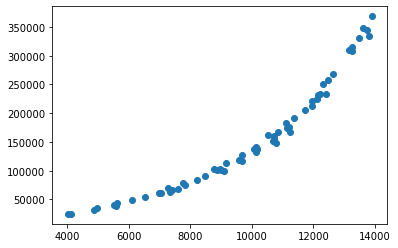

In [233]:
plt.plot(n_modules_per_event, n_cells_per_event, "o")
#plt.yscale("log")
plt.show()

In [212]:
hk_fconn_mu_times.shape

(16, 10, 63)

In [213]:
n_total_msmnts_wrt_thread = n_total_events * n_msmnts
n_total_msmnts_wrt_event = n_diff_threads * n_msmnts

# get time wrt the number of threads
hk_fconn_mu_means_wrt_thread = np.mean(hk_fconn_mu_times.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1)
hk_fconn_mu_std_wrt_thread = np.std(hk_fconn_mu_times.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1)
hk_fconn_mu_err_wrt_thread = hk_fconn_mu_std_wrt_thread / np.sqrt(n_total_msmnts_wrt_thread)

mu_SPCCL_CPU_means_wrt_thread = np.mean(mu_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1)
mu_SPCCL_CPU_std_wrt_thread = np.std(mu_SPCCL_CPU_times.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1)
mu_SPCCL_CPU_err_wrt_thread = mu_SPCCL_CPU_std_wrt_thread / np.sqrt(n_total_msmnts_wrt_thread)

# get the time wrt the module and cell number
hk_fconn_mu_means_wrt_event = np.mean(hk_fconn_mu_times.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0)
hk_fconn_mu_std_wrt_event = np.std(hk_fconn_mu_times.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0)
hk_fconn_mu_err_wrt_event = hk_fconn_mu_std_wrt_event / np.sqrt(n_total_msmnts_wrt_event)

hk_fconn_mu_means_1024_threads = np.mean(hk_fconn_mu_times[15,:,:].reshape(n_msmnts, n_total_events), axis=0)
hk_fconn_mu_std_1024_threads = (np.std(hk_fconn_mu_times[15,:,:].reshape(n_msmnts, n_total_events), axis=0))
hk_fconn_mu_err_1024_threads = hk_fconn_mu_std_1024_threads / np.sqrt(n_msmnts)

mu_SPCCL_CPU_means_wrt_event = np.mean(mu_SPCCL_CPU_times.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0)
mu_SPCCL_CPU_std_wrt_event = np.std(mu_SPCCL_CPU_times.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0)
mu_SPCCL_CPU_err_wrt_event = mu_SPCCL_CPU_std_wrt_event / np.sqrt(n_total_msmnts_wrt_event)

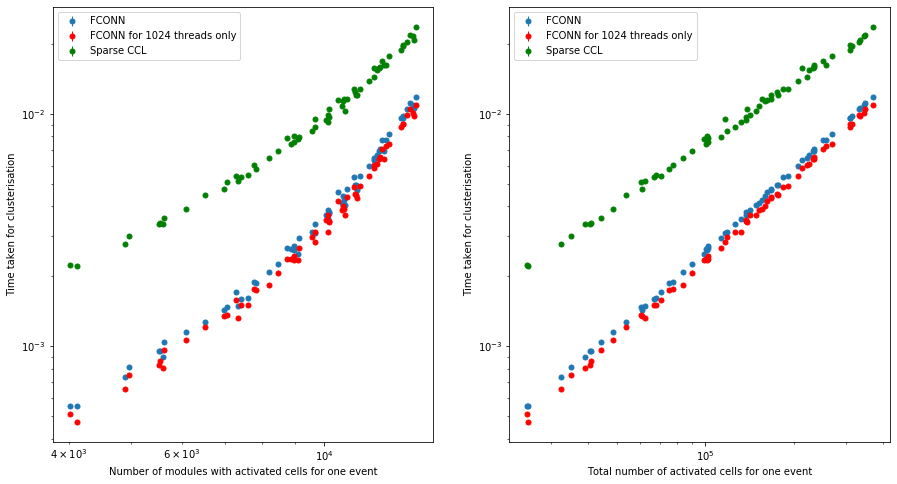

In [231]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.errorbar(n_modules_per_event, hk_fconn_mu_means_wrt_event, yerr=hk_fconn_mu_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN")
ax1.errorbar(n_modules_per_event, hk_fconn_mu_means_1024_threads, yerr=hk_fconn_mu_err_1024_threads,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN for 1024 threads only", color="r")
ax1.errorbar(n_modules_per_event, mu_SPCCL_CPU_means_wrt_event, yerr=mu_SPCCL_CPU_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL", color="g")
ax1.set_xlabel("Number of modules with activated cells for one event")
ax1.set_ylabel("Time taken for clusterisation")
ax1.legend()

ax2.errorbar(n_cells_per_event, hk_fconn_mu_means_wrt_event, yerr=hk_fconn_mu_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN")
ax2.errorbar(n_cells_per_event, hk_fconn_mu_means_1024_threads, yerr=hk_fconn_mu_err_1024_threads,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN for 1024 threads only", color="r")
ax2.errorbar(n_cells_per_event, mu_SPCCL_CPU_means_wrt_event, yerr=mu_SPCCL_CPU_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL", color="g")
ax2.set_xlabel("Total number of activated cells for one event")
ax2.set_ylabel("Time taken for clusterisation")
ax2.legend()

# ax2.errorbar(n_modules_per_event, hk_fconn_mu_means_wrt_event, yerr=hk_fconn_mu_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="FCONN")
# ax2.errorbar(n_modules_per_event, mu_SPCCL_CPU_means_wrt_event, yerr=mu_SPCCL_CPU_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL")
# ax2.legend()
ax1.set_yscale("log")
ax1.set_xscale("log")

ax2.set_yscale("log")
ax2.set_xscale("log")
plt.savefig("clusterisation_times_mu.pdf")

plt.show()

In [234]:
fconn_times_ratio = hk_fconn_mu_means_wrt_event/mu_SPCCL_CPU_means_wrt_event
fconn_times_ratio_err = fconn_times_ratio * (hk_fconn_mu_err_wrt_event / hk_fconn_mu_means_wrt_event
                                            +mu_SPCCL_CPU_err_wrt_event / mu_SPCCL_CPU_means_wrt_event)
fconn_times_ratio1024 = hk_fconn_mu_means_1024_threads/mu_SPCCL_CPU_means_wrt_event
fconn_times_ratio1024_err = fconn_times_ratio * (hk_fconn_mu_err_1024_threads / hk_fconn_mu_means_1024_threads
                                                +mu_SPCCL_CPU_err_wrt_event / mu_SPCCL_CPU_means_wrt_event)

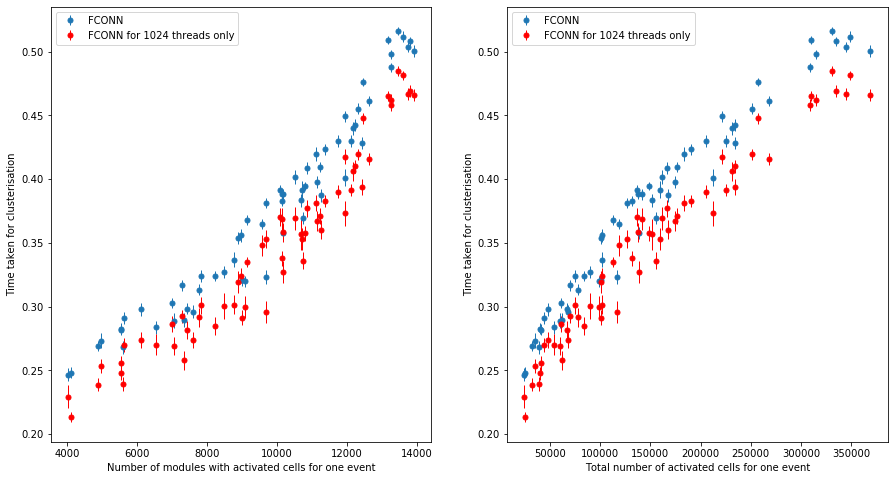

In [239]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.errorbar(n_modules_per_event, fconn_times_ratio, yerr=fconn_times_ratio_err,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN")
ax1.errorbar(n_modules_per_event, fconn_times_ratio1024, yerr=fconn_times_ratio1024_err,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN for 1024 threads only", color="r")
ax1.set_xlabel("Number of modules with activated cells for one event")
ax1.set_ylabel("Time taken for clusterisation")
ax1.legend()

ax2.errorbar(n_cells_per_event, fconn_times_ratio, yerr=fconn_times_ratio_err,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN")
ax2.errorbar(n_cells_per_event, fconn_times_ratio1024, yerr=fconn_times_ratio1024_err,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN for 1024 threads only", color="r")

ax2.set_xlabel("Total number of activated cells for one event")
ax2.set_ylabel("Time taken for clusterisation")
ax2.legend()

# ax2.errorbar(n_modules_per_event, hk_fconn_mu_means_wrt_event, yerr=hk_fconn_mu_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="FCONN")
# ax2.errorbar(n_modules_per_event, mu_SPCCL_CPU_means_wrt_event, yerr=mu_SPCCL_CPU_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL")
# ax2.legend()
# ax1.set_yscale("log")
# ax1.set_xscale("log")

#ax2.set_yscale("log")
#ax2.set_xscale("log")
plt.savefig("clusterisation_times_mu_ratio.pdf")

plt.show()

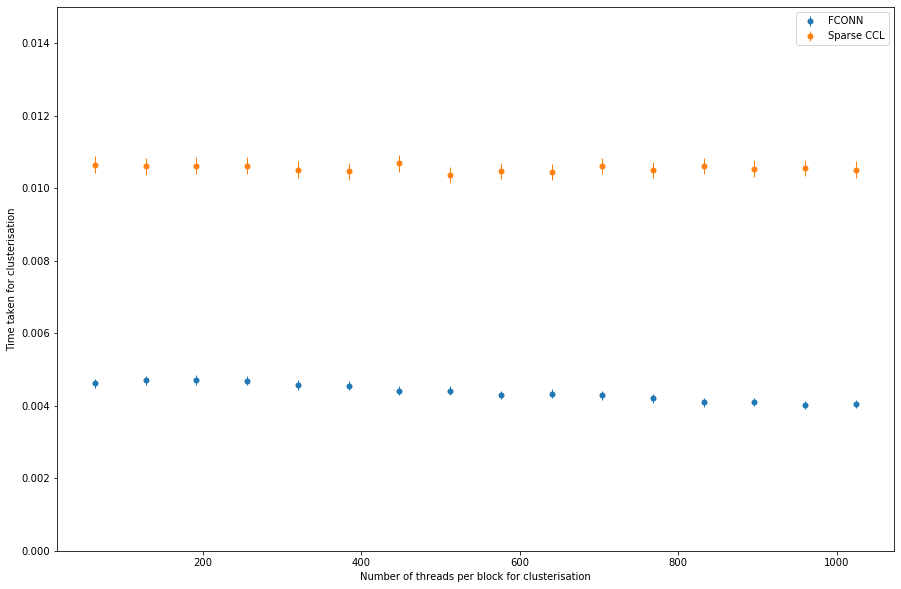

In [240]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))

ax1.errorbar(thread_nos, hk_fconn_mu_means_wrt_thread, yerr=hk_fconn_mu_err_wrt_thread,
            ls="none", marker="o", markersize=5, lw=1, label="FCONN")
ax1.errorbar(thread_nos, mu_SPCCL_CPU_means_wrt_thread, yerr=mu_SPCCL_CPU_err_wrt_thread,
            ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL")
ax1.set_xlabel("Number of threads per block for clusterisation")
ax1.set_ylabel("Time taken for clusterisation")
ax1.legend()
ax1.set_ylim(0,0.015)

plt.savefig("clusterisation_times_mu_wrt_threads.pdf")
plt.show()

In [245]:
# first get the mean spacepoint accuracy
# wrt the number of threads
hk_fconn_mu_track_acc_means_wrt_thread = (
    np.mean(hk_fconn_mu_track_accuracy.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1))
hk_fconn_mu_track_acc_std_wrt_thread = (
    np.std(hk_fconn_mu_track_accuracy.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1))
hk_fconn_mu_track_acc_err_wrt_thread = (
    hk_fconn_mu_track_acc_std_wrt_thread / np.sqrt(n_total_msmnts_wrt_thread))
# then wrt the number of modules/cells in the event
hk_fconn_mu_track_acc_means_wrt_event = (
    np.mean(hk_fconn_mu_track_accuracy.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0))
hk_fconn_mu_track_acc_std_wrt_event = (
    np.std(hk_fconn_mu_track_accuracy.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0))
hk_fconn_mu_track_acc_err_wrt_event = (
    hk_fconn_mu_track_acc_std_wrt_event / np.sqrt(n_total_msmnts_wrt_event))
# only for 1024
hk_fconn_mu_track_acc_means_1024_threads = (
    np.mean(hk_fconn_mu_track_accuracy[15,:,:].reshape(n_msmnts, n_total_events), axis=0))
hk_fconn_mu_track_acc_std_1024_threads = (
    np.std(hk_fconn_mu_track_accuracy[15,:,:].reshape(n_msmnts, n_total_events), axis=0))
hk_fconn_mu_track_acc_err_1024_threads = (
    hk_fconn_mu_track_acc_std_1024_threads / np.sqrt(n_total_msmnts_wrt_event))


# Now the same but for measurement accuracy
hk_fconn_mu_msmnt_acc_means_wrt_thread = (
    np.mean(hk_fconn_mu_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1))
hk_fconn_mu_msmnt_acc_std_wrt_thread = (
    np.std(hk_fconn_mu_msmnt_accuracy.reshape(n_diff_threads, n_total_msmnts_wrt_thread), axis=1))
hk_fconn_mu_msmnt_acc_err_wrt_thread = (
    hk_fconn_mu_msmnt_acc_std_wrt_thread / np.sqrt(n_total_msmnts_wrt_thread))
# then wrt the number of modules/cells in the event
hk_fconn_mu_msmnt_acc_means_wrt_event = (
    np.mean(hk_fconn_mu_msmnt_accuracy.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0))
hk_fconn_mu_msmnt_acc_std_wrt_event = (
    np.std(hk_fconn_mu_msmnt_accuracy.reshape(n_total_msmnts_wrt_event, n_total_events), axis=0))
hk_fconn_mu_msmnt_acc_err_wrt_event = (
    hk_fconn_mu_msmnt_acc_std_wrt_event / np.sqrt(n_total_msmnts_wrt_event))
# now wrt number of modules/cells in the event for just 1024 threads
hk_fconn_mu_msmnt_acc_means_1024_threads = (
    np.mean(hk_fconn_mu_msmnt_accuracy[15,:,:].reshape(n_msmnts, n_total_events), axis=0))
hk_fconn_mu_msmnt_acc_std_1024_threads = (
    np.std(hk_fconn_mu_msmnt_accuracy[15,:,:].reshape(n_msmnts, n_total_events), axis=0))
hk_fconn_mu_msmnt_acc_err_1024_threads = (
    hk_fconn_mu_msmnt_acc_std_1024_threads / np.sqrt(n_total_msmnts_wrt_event))

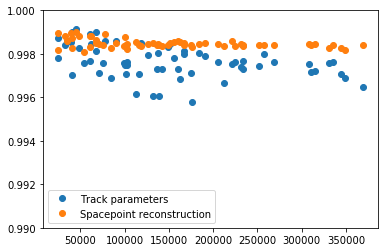

In [246]:
plt.plot(n_cells_per_event, hk_fconn_mu_track_acc_means_wrt_event, "o", label="Track parameters")
plt.plot(n_cells_per_event, hk_fconn_mu_msmnt_acc_means_wrt_event, "o", label="Spacepoint reconstruction")
plt.ylim(0.99,1)
plt.legend()
plt.show()

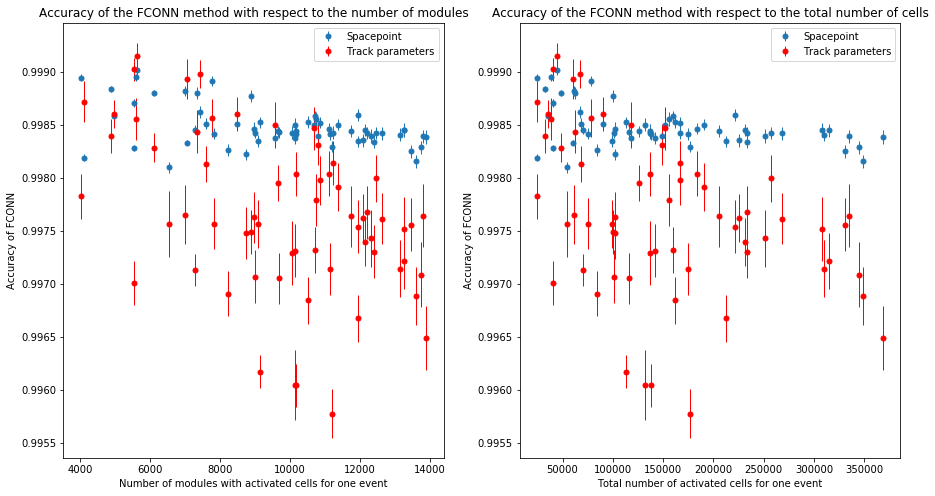

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.errorbar(n_modules_per_event, hk_fconn_mu_msmnt_acc_means_wrt_event, yerr=hk_fconn_mu_msmnt_acc_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Spacepoint")
# ax1.errorbar(n_modules_per_event, hk_fconn_mu_msmnt_acc_means_1024_threads,
#              yerr=hk_fconn_mu_msmnt_acc_err_1024_threads, ls="none", marker="o", markersize=5, lw=1,
#              label="Spacepoint accuracy for 1024 threads only", color="g")
ax1.errorbar(n_modules_per_event, hk_fconn_mu_track_acc_means_wrt_event, yerr=hk_fconn_mu_track_acc_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Track parameters", color="r")
# ax1.errorbar(n_modules_per_event, hk_fconn_mu_track_acc_means_1024_threads,
#              yerr=hk_fconn_mu_track_acc_err_1024_threads, ls="none", marker="o", markersize=5, lw=1,
#              label="Track parameter accuracy for 1024 threads only", color="purple")

ax1.set_xlabel("Number of modules with activated cells for one event")
ax1.set_ylabel("Accuracy of FCONN")
ax1.set_title("Accuracy of the FCONN method with respect to the number of modules")
ax1.legend()

ax2.errorbar(n_cells_per_event, hk_fconn_mu_msmnt_acc_means_wrt_event, yerr=hk_fconn_mu_msmnt_acc_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Spacepoint")
# ax2.errorbar(n_cells_per_event, hk_fconn_mu_msmnt_acc_means_1024_threads,
#              yerr=hk_fconn_mu_msmnt_acc_err_1024_threads, ls="none", marker="o", markersize=5, lw=1,
#              label="Spacepoint accuracy for 1024 threads only", color="g")
ax2.errorbar(n_cells_per_event, hk_fconn_mu_track_acc_means_wrt_event, yerr=hk_fconn_mu_track_acc_err_wrt_event,
            ls="none", marker="o", markersize=5, lw=1, label="Track parameters", color="r")
# ax2.errorbar(n_cells_per_event, hk_fconn_mu_track_acc_means_1024_threads,
#              yerr=hk_fconn_mu_track_acc_err_1024_threads, ls="none", marker="o", markersize=5, lw=1,
#              label="Track parameter accuracy for 1024 threads only", color="purple")
ax2.set_xlabel("Total number of activated cells for one event")
ax2.set_ylabel("Accuracy of FCONN")
ax2.set_title("Accuracy of the FCONN method with respect to the total number of cells")
ax2.legend()

# ax2.errorbar(n_modules_per_event, hk_fconn_mu_means_wrt_event, yerr=hk_fconn_mu_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="FCONN")
# ax2.errorbar(n_modules_per_event, mu_SPCCL_CPU_means_wrt_event, yerr=mu_SPCCL_CPU_err_wrt_event,
#             ls="none", marker="o", markersize=5, lw=1, label="Sparse CCL")
# ax2.legend()
# ax1.set_yscale("log")
# ax1.set_xscale("log")

# ax2.set_yscale("log")
# ax2.set_xscale("log")

plt.savefig("accuracy_plots_mu.pdf")
plt.show()

In [266]:
from scipy.optimize import curve_fit

def ref_model_square(n_cells, b, c, d, e):
    return (n_cells**2)*b + (n_cells)*c + d + np.log(n_cells)*e

def ref_model_cube(n_cells, a, b, c, d, e):
    return (n_cells**3)*a + (n_cells**2)*b + (n_cells)*c + d + np.log(n_cells)*e

In [268]:
mod_fit_fconn_2 = curve_fit(ref_model_square, n_modules_per_event, hk_fconn_mu_means_wrt_event,
                            sigma=hk_fconn_mu_err_wrt_event)
mod_fit_fconn1024_2 = curve_fit(ref_model_square, n_modules_per_event, hk_fconn_mu_means_1024_threads,
                            sigma=hk_fconn_mu_err_1024_threads)
mod_fit_ccl_cpu_2 = curve_fit(ref_model_square, n_modules_per_event, mu_SPCCL_CPU_means_wrt_event,
                              sigma=mu_SPCCL_CPU_err_wrt_event)

mod_fit_fconn_3 = curve_fit(ref_model_cube, n_modules_per_event, hk_fconn_mu_means_wrt_event,
                            sigma=hk_fconn_mu_err_wrt_event)
mod_fit_fconn1024_3 = curve_fit(ref_model_cube, n_modules_per_event, hk_fconn_mu_means_1024_threads,
                            sigma=hk_fconn_mu_err_1024_threads)
mod_fit_ccl_cpu_3 = curve_fit(ref_model_cube, n_modules_per_event, mu_SPCCL_CPU_means_wrt_event,
                              sigma=mu_SPCCL_CPU_err_wrt_event)

In [264]:
fconn_2_fit = 

[ 2.40726897e-10 -5.08503656e-06 -1.04525148e-01  1.46507478e-02]
[ 3.74969663e-10 -7.76709270e-06 -1.76735068e-01  2.45710296e-02]
